In [185]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Clase 28 - Data Wrangling II/p_data.csv', sep=";", encoding="ISO-8859-1")
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Clase 28 - Data Wrangling II/w_data.csv', sep=";", encoding="ISO-8859-1")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
df1.head()

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [187]:
df2.head()

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [188]:
col1 = sorted(df1)
col1

['Age',
 'Country',
 'Education',
 'Education-Num',
 'ID',
 'Marital Status',
 'Race',
 'Relationship',
 'Sex']

In [189]:
col2 = sorted(df2)
col2

['Capital Gain',
 'Capital Loss',
 'Hours per week',
 'ID',
 'Target',
 'Workclass',
 'fnlwgt']

In [190]:
# Leer los set de datos w_data.csv y p_data.csv, fusionarlos a partir de la 
# variable que tengan en común (ID) (inner por defecto elimina el dato que no tienen en común)
df3 = pd.merge(df1,df2, how='inner', indicator=False)
df3

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family,State-gov,77516.0,2174.0,0.0,40.0,<=50K
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,Self-emp-not-inc,83311.0,0.0,0.0,13.0,<=50K
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family,Private,215646.0,0.0,0.0,40.0,<=50K
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband,Private,234721.0,0.0,0.0,40.0,<=50K
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,Private,338409.0,0.0,0.0,40.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,33.0,Male,597186815,White,United-States,Bachelors,13.0,Never-married,Own-child,Private,245211.0,0.0,0.0,40.0,<=50K.
48838,39.0,Female,735617153,White,United-States,Bachelors,13.0,Divorced,Not-in-family,Private,215419.0,0.0,0.0,36.0,<=50K.
48839,64.0,Male,1131807446,Black,United-States,HS-grad,9.0,Widowed,Other-relative,?,321403.0,0.0,0.0,40.0,<=50K.
48840,38.0,Male,781422087,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,Private,374983.0,0.0,0.0,50.0,<=50K.


In [191]:
# 1. Cuantos id tienen en común:
len(df3)

48842

In [192]:
# 1. Cuanto ID no tienen en común:
## Controlamos que valores del df2 no están en df1 (Se eliminó utilizando "inner" en la función merge en la línea anetrior)
df2[-df2.ID.isin(df1.ID)]  

,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
48842,Self-emp-inc,182148.0,0.0,0.0,60.0,1344995623,>50K.


In [193]:
df3.Target.unique()

array([' <=50K', ' >50K', nan, ' <=50K.', ' >50K.'], dtype=object)

In [194]:
# 2 Corregir los target a solo dos valores distintos ‘<=50k’ y ‘>50k’
df3.Target = df3.Target.replace(' <=50K','<=50K').replace(' >50K','>50K').replace(' <=50K.','<=50K').replace(' >50K.','>50K')

In [195]:
# Verficamos cambio:
df3.Target.unique()

array(['<=50K', '>50K', nan], dtype=object)

In [196]:
# Identificamos y dropeamos el valor nan:
val_nan = df3[(df3['Target'] != '<=50K') & (df3['Target'] != '>50K')]
val_nan

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
32561,NaN,NaN,37078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
# Eliminamos la fila:
df3 = df3.drop([32561])
df3

,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,Target
0,39.0,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family,State-gov,77516.0,2174.0,0.0,40.0,<=50K
1,50.0,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,Self-emp-not-inc,83311.0,0.0,0.0,13.0,<=50K
2,38.0,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family,Private,215646.0,0.0,0.0,40.0,<=50K
3,53.0,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband,Private,234721.0,0.0,0.0,40.0,<=50K
4,28.0,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife,Private,338409.0,0.0,0.0,40.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,33.0,Male,597186815,White,United-States,Bachelors,13.0,Never-married,Own-child,Private,245211.0,0.0,0.0,40.0,<=50K
48838,39.0,Female,735617153,White,United-States,Bachelors,13.0,Divorced,Not-in-family,Private,215419.0,0.0,0.0,36.0,<=50K
48839,64.0,Male,1131807446,Black,United-States,HS-grad,9.0,Widowed,Other-relative,?,321403.0,0.0,0.0,40.0,<=50K
48840,38.0,Male,781422087,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband,Private,374983.0,0.0,0.0,50.0,<=50K


In [198]:
df3.Target.unique()

array(['<=50K', '>50K'], dtype=object)

In [205]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

# 3. Para calcular las proporciones en base a los criterios de Sex, Race y Educatio, necesitamos filtrar la variable 'Target' para valores >50k

df4 = df3[df3['Target'] == '>50K']


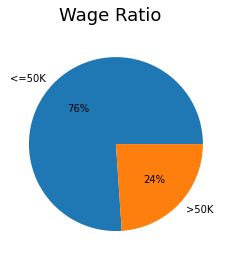

In [206]:
## Proporcion de Salarios
comp1 = df3.groupby(['Target'])['ID'].count()
labels = df3.Target.unique()
plt.pie(comp1, labels=labels, autopct='%.0f%%')
plt.suptitle("Wage Ratio", fontsize=18)
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


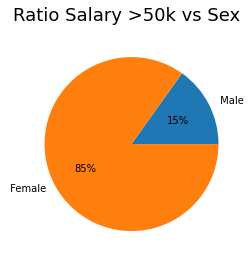

In [207]:
## Proporcion de salarios >50k según variable 'Sex'
comp2 = df4.groupby(['Sex'])[['Target']].count()
labels = df3.Sex.unique()
plt.pie(comp2, labels=labels, autopct='%.0f%%')
plt.suptitle("Ratio Salary >50k vs Sex", fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


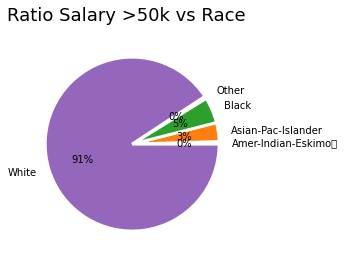

In [208]:
## Proporcion de salarios >50k según variable 'Race'
comp3 = df4.groupby(['Race'])[['Target']].count()
labels = ['Amer-Indian-Eskimo	', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
plt.pie(comp3, labels=labels, autopct='%.0f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.suptitle("Ratio Salary >50k vs Race", fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


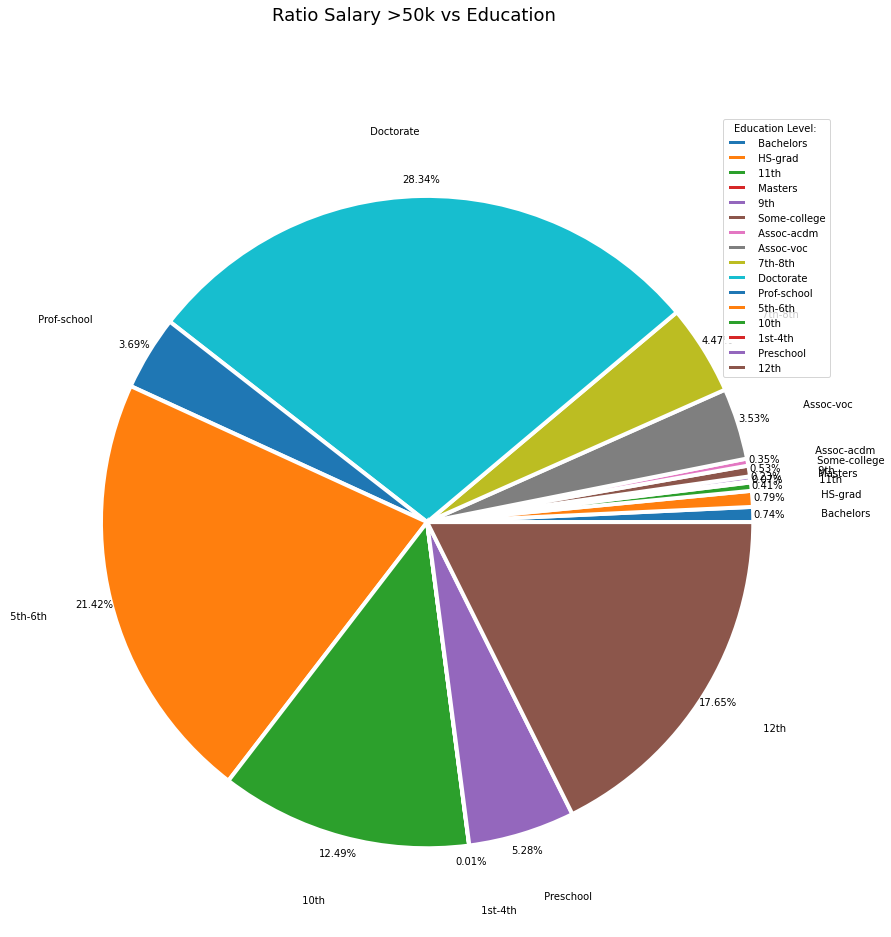

In [209]:
## Proporcion de salarios >50k según variable 'Education'
comp4 = df4.groupby(['Education'])[['Target']].count()
pie, ax = plt.subplots(figsize=[15,15])
labels = df3.Education.unique()
plt.pie(comp4, labels=labels, autopct='%1.2f%%', pctdistance=1.05, labeldistance=1.20, wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' })
plt.suptitle("Ratio Salary >50k vs Education", fontsize=18)
plt.legend(title = "Education Level: ")
plt.show()